In [1]:
import common

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import mlba

%matplotlib inline

no display found. Using non-interactive Agg backend


In [3]:
car_df = mlba.load_data('ToyotaCorolla.csv')
car_df = car_df.iloc[0:1000]
excludeColumns = ('Price', 'Id', 'Model', 'Fuel_Type', 'Color')
predictors = [column for column in car_df.columns if column not in excludeColumns]
outcome = 'Price'
X = car_df[predictors]
y = car_df[outcome]
train_X, holdout_X, train_y, holdout_y = train_test_split(X, y, test_size=0.4,
                                                          random_state=1)

reg = LinearRegression()
reg.fit(train_X, train_y)

df = pd.DataFrame({'predicted': reg.predict(holdout_X),
                   'actual': holdout_y})

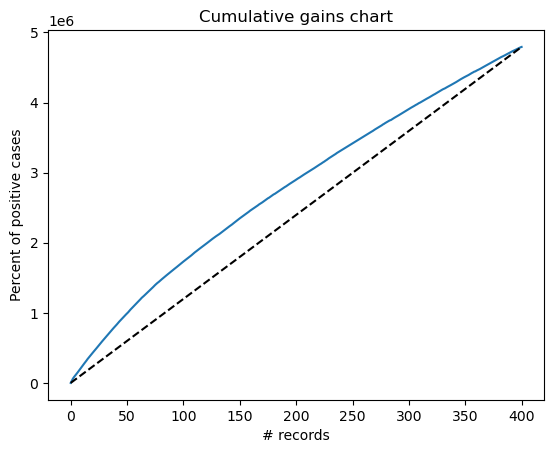

In [4]:
mlba.gainsChart(df, ranking='predicted', actual='actual', type='regression')
plt.show()

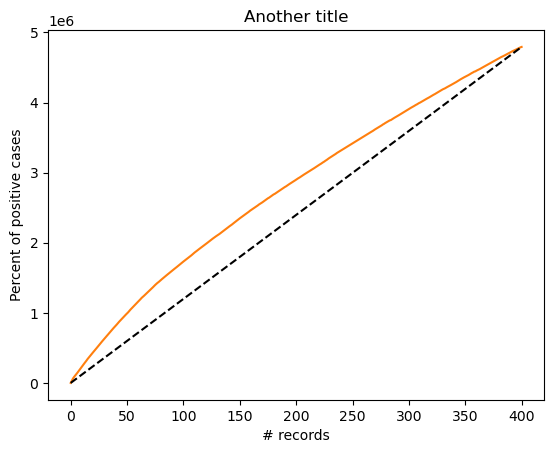

In [6]:
mlba.gainsChart(df, ranking='predicted', actual='actual', type='regression',
               title='Another title', color='C1')
plt.show()

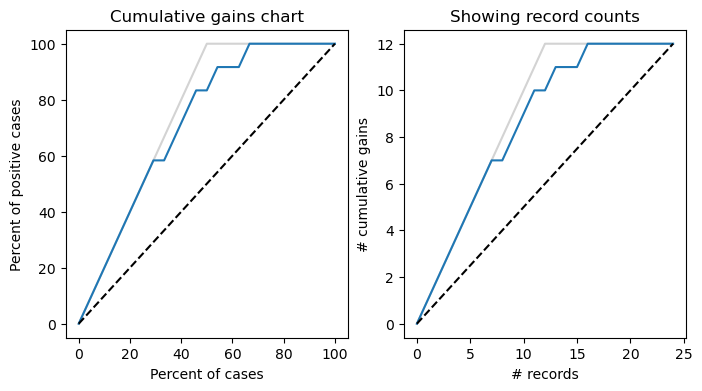

In [8]:
df = mlba.load_data('liftExample.csv')
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
mlba.gainsChart(df, ranking='prob', actual='actual', ax=axes[0])
mlba.gainsChart(df, ranking='prob', actual='actual', show_counts=True, 
                title='Showing record counts',
                ax=axes[1])
plt.show()

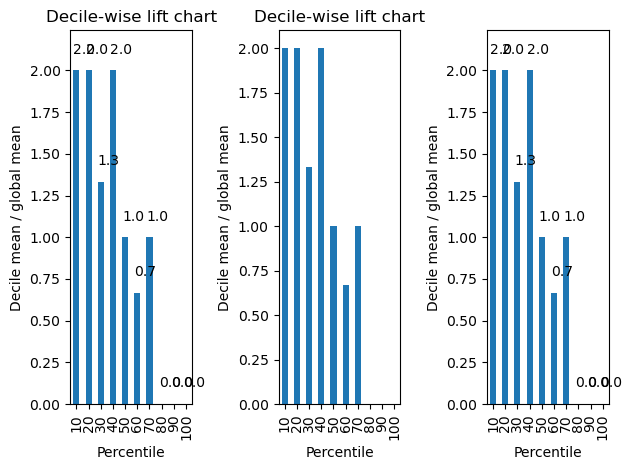

In [12]:
fig, axes = plt.subplots(ncols=3)
mlba.liftChart(df, ranking='prob', actual='actual', ax=axes[0])
mlba.liftChart(df, ranking='prob', actual='actual', labelBars=False,
               ax=axes[1])
mlba.liftChart(df, ranking='prob', actual='actual', title='', ax=axes[2])
plt.tight_layout()